In [20]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import geopandas as gpd
from wordcloud import WordCloud
from dython.nominal import associations # correlation calculation
from scipy.stats import chi2_contingency
sb.set()

#### Read pickle file (Cleaned data)

In [2]:
df = pd.read_pickle('data_eda.pickle')

In [3]:
# to display every row and column
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,latitude,longitude,eventid,iyear,imonth,iday,extended,country,region,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,guncertain1,individual,nperpcap,claimed,weaptype1,weapsubtype1,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,ishostkid,ransom,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
4,37.005105,-89.176269,197001010002,1970,1,1,0,United States,North America,1.0,0.0,1,1,1,0.0,0.0,1,0,Armed Assault,Police,"Police Building (headquarters, station, school)",United States,0.0,0,0.127628,0.0,Firearms,Unknown Gun Type,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
5,43.468500,-89.744299,197001050001,1970,1,1,0,United States,North America,1.0,0.0,1,1,0,1.0,0.0,0,0,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,United States,0.0,0,0.127628,0.0,Explosives,Unknown Explosive Type,0.0,0.045981,0.508058,0.0,0.038944,0.107163,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-34.891151,-56.187214,197001020001,1970,1,2,0,Uruguay,South America,1.0,0.0,1,1,1,0.0,0.0,0,0,Assassination,Police,Police Security Forces/Officers,Uruguay,0.0,0,0.127628,0.0,Firearms,Automatic or Semi-Automatic Rifle,0.0,0.045981,0.508058,0.0,0.038944,0.107163,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
7,37.791927,-122.225906,197001020002,1970,1,2,0,United States,North America,1.0,0.0,1,1,1,1.0,0.0,1,0,Bombing/Explosion,Utilities,Electricity,United States,0.0,0,0.127628,0.0,Explosives,Unknown Explosive Type,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
8,43.076592,-89.412488,197001020003,1970,1,2,0,United States,North America,1.0,0.0,1,1,1,0.0,0.0,1,0,Facility/Infrastructure Attack,Military,Military Recruiting Station/Academy,United States,0.0,0,1.000000,1.0,Incendiary,Molotov Cocktail/Petrol Bomb,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180800 entries, 4 to 181690
Data columns (total 42 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   latitude      180800 non-null  float64 
 1   longitude     180800 non-null  float64 
 2   eventid       180800 non-null  int64   
 3   iyear         180800 non-null  category
 4   imonth        180800 non-null  category
 5   iday          180800 non-null  category
 6   extended      180800 non-null  category
 7   country       180800 non-null  category
 8   region        180800 non-null  category
 9   specificity   180800 non-null  category
 10  vicinity      180800 non-null  category
 11  crit1         180800 non-null  category
 12  crit2         180800 non-null  category
 13  crit3         180800 non-null  category
 14  doubtterr     180800 non-null  category
 15  multiple      180800 non-null  category
 16  success       180800 non-null  category
 17  suicide       180800 non-null  cat

## Correlation Matrix

#### Correlation of categorical data

<Axes: >

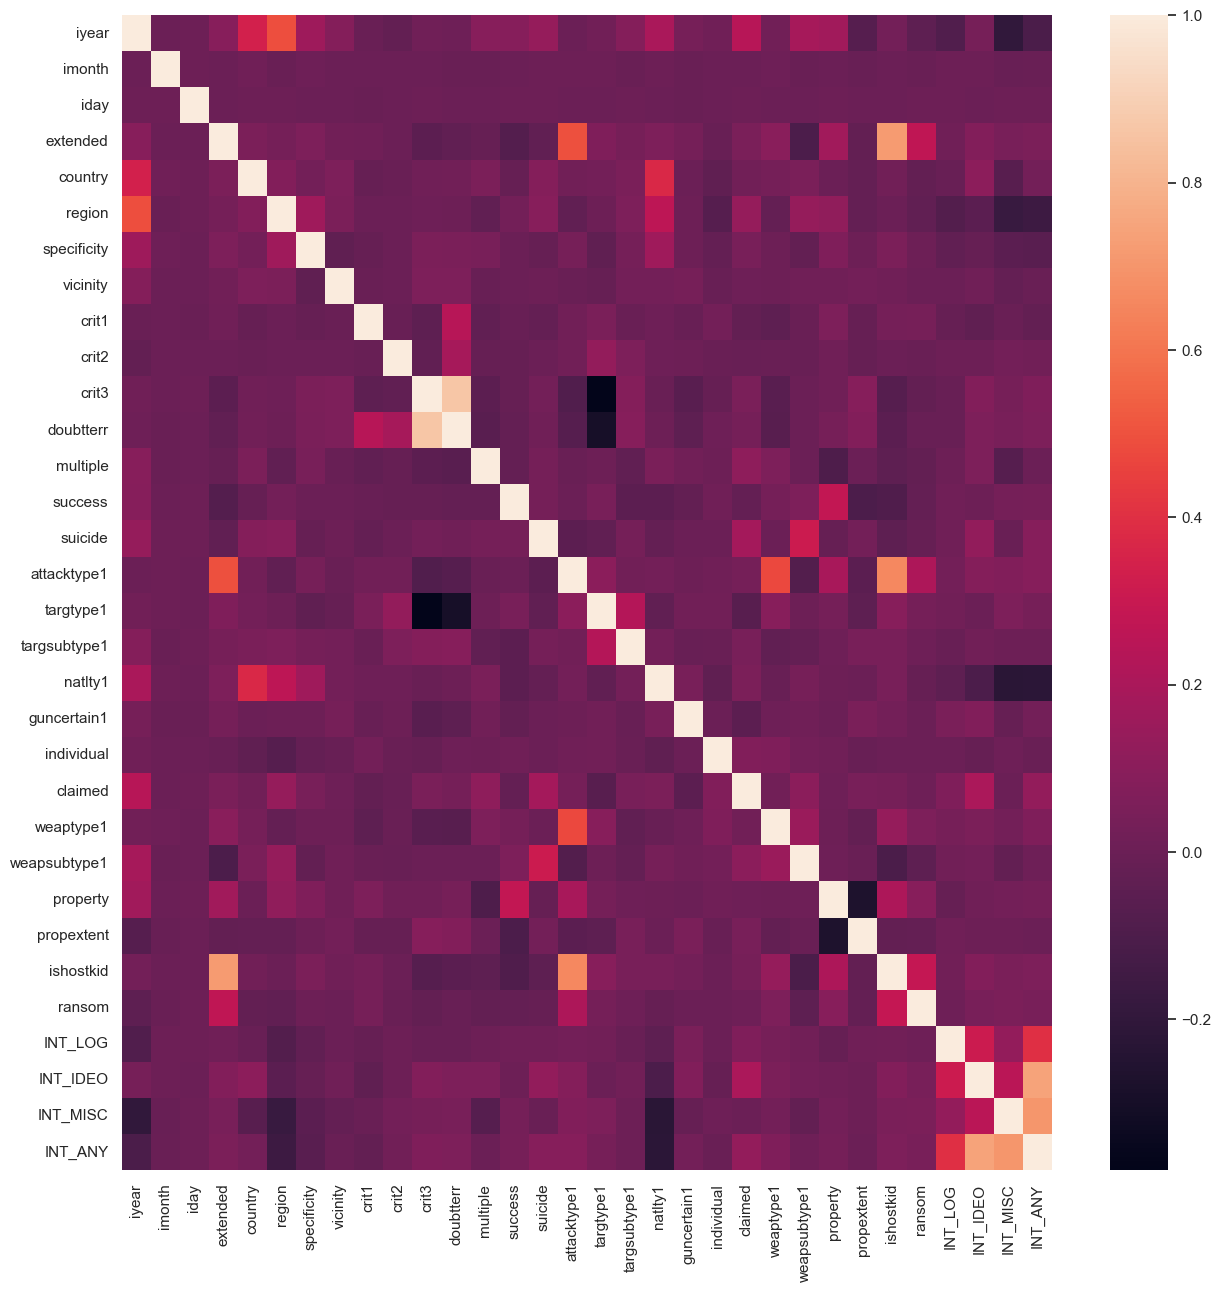

In [6]:
plt.figure(figsize=(15,15))
cat = df.select_dtypes(include=['category'])
sb.heatmap(cat.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1))

There is strong correlation between targtype1 and crit3 and doubtterr.  
There is moderately strong correlation between ishostkid and extended.

#### Correlation of numeric data

<Axes: >

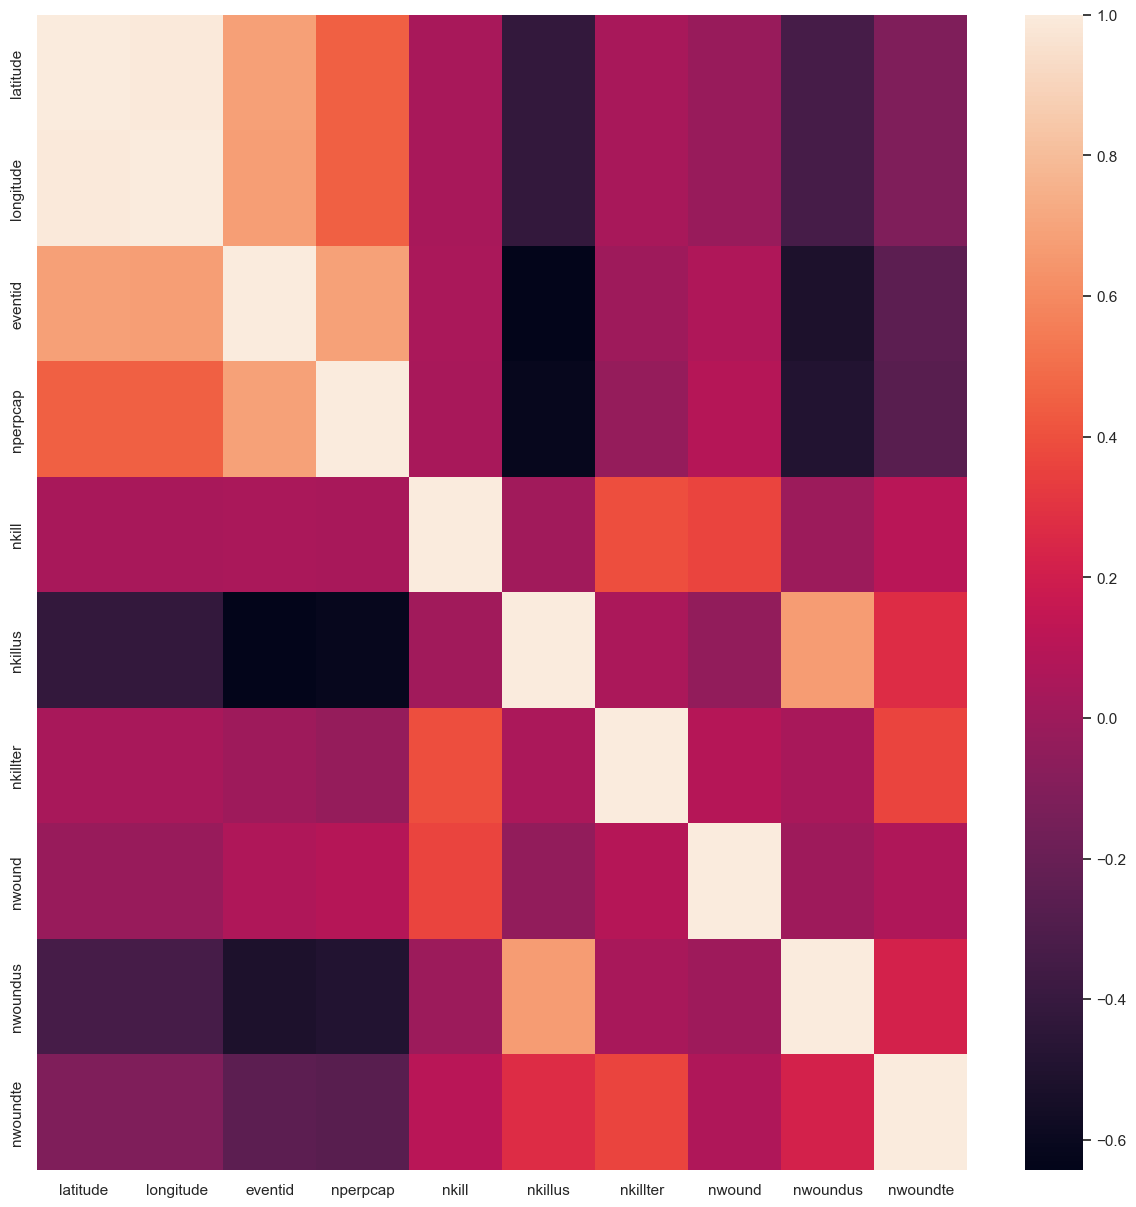

In [7]:
plt.figure(figsize=(15,15))
num = df.select_dtypes(include=['number'])
sb.heatmap(num.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1))

There is strong correlation between nkillus and nwoundus with latitude and longtitude.

## Success ratio

C:\Users\pinoc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2400x1000 with 0 Axes>

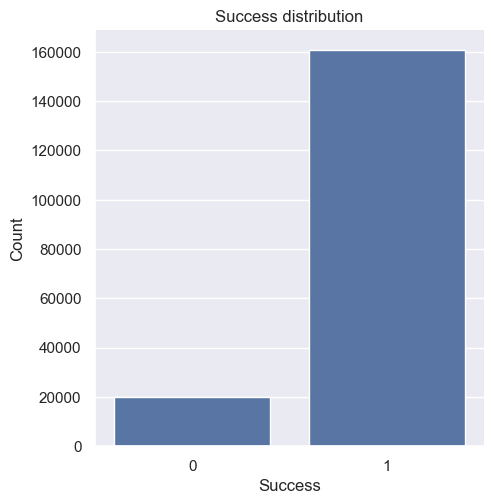

In [8]:
f = plt.figure(figsize=(24,10))
sb.catplot(x="success", data=df, kind="count").set(
    title="Success distribution", 
    xlabel='Success', 
    ylabel='Count')
plt.show()

## Distribution of nkill and success

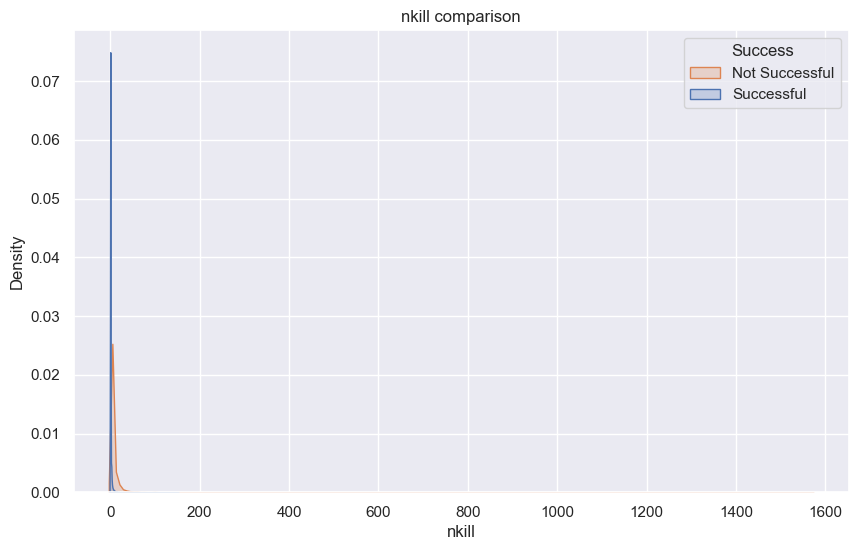

In [9]:
plt.figure(figsize=(10, 6))
sb.kdeplot(data=df, x='nkill', hue='success', fill=True)
plt.title('nkill comparison')
plt.xlabel('nkill')
plt.ylabel('Density')
plt.legend(title='Success', labels=['Not Successful', 'Successful'])
plt.show()

Majority of nkill data points are clustered together. Unsuccessful attacks have greater variation than successful attacks.

## Map of Terrorist Attacks

C:\Users\pinoc\AppData\Local\Temp\ipykernel_8016\1025024176.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


Text(155.375, 0.5, 'Latitude')

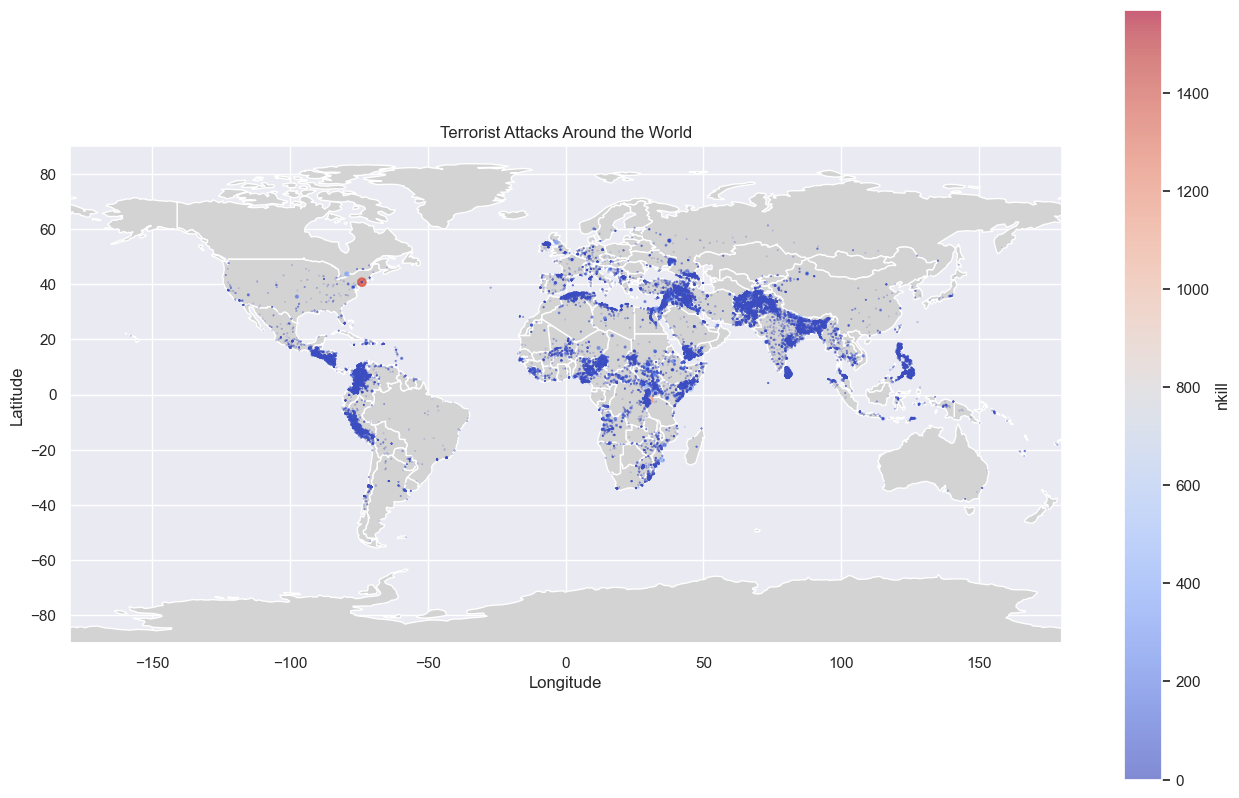

In [10]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(16, 10))
worldmap.plot(color="lightgrey", ax=ax)

# Plotting tourist source markets
x = df['longitude']
y = df['latitude']
z = df['nkill']
plt.scatter(x, y, 
              s=0.025*z,
              c=z,
              alpha=0.6,             
              cmap='coolwarm'
            )
plt.colorbar(label='nkill')
# Creating axis limits and title
plt.xlim([-180, 180])
plt.ylim([-90, 90])

plt.title("Terrorist Attacks Around the World")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

Terrorist attacks seems to be more common in regions like Africa, European countries, parts of South America and West Asia. 

However, there is an attack in the USA with a high number of deaths while the other attacks in other areas typically have a low kill count.

## Countries with the most terrorist attacks

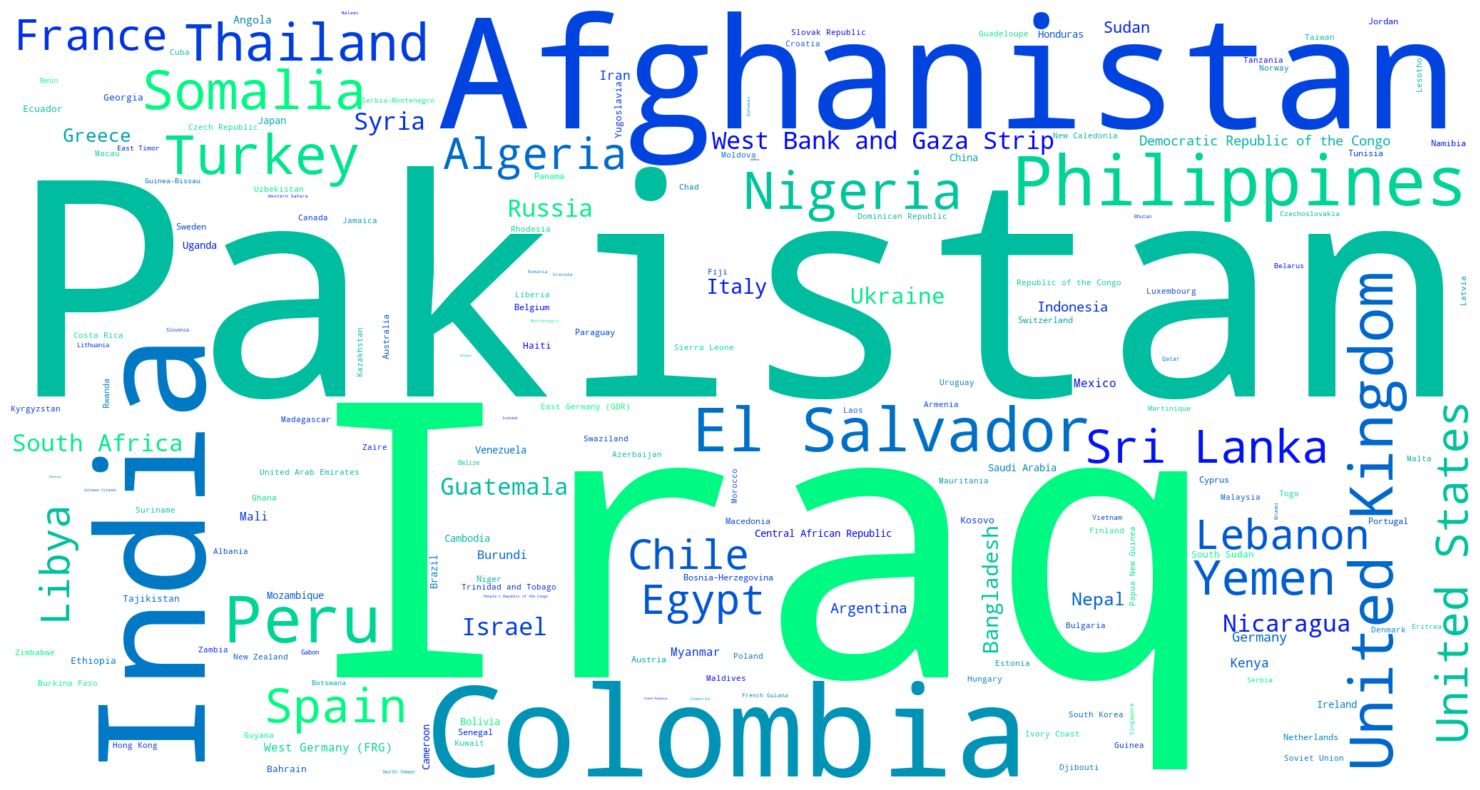

In [11]:
country_count = df['country'].value_counts()
country_freq = country_count.to_dict()

wc = WordCloud(collocations=False, background_color='white', width=2048, height=1080, colormap='winter')
wc.generate_from_frequencies(country_freq)

f = plt.figure(figsize=(24,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Text(0.5, 0, 'Country')

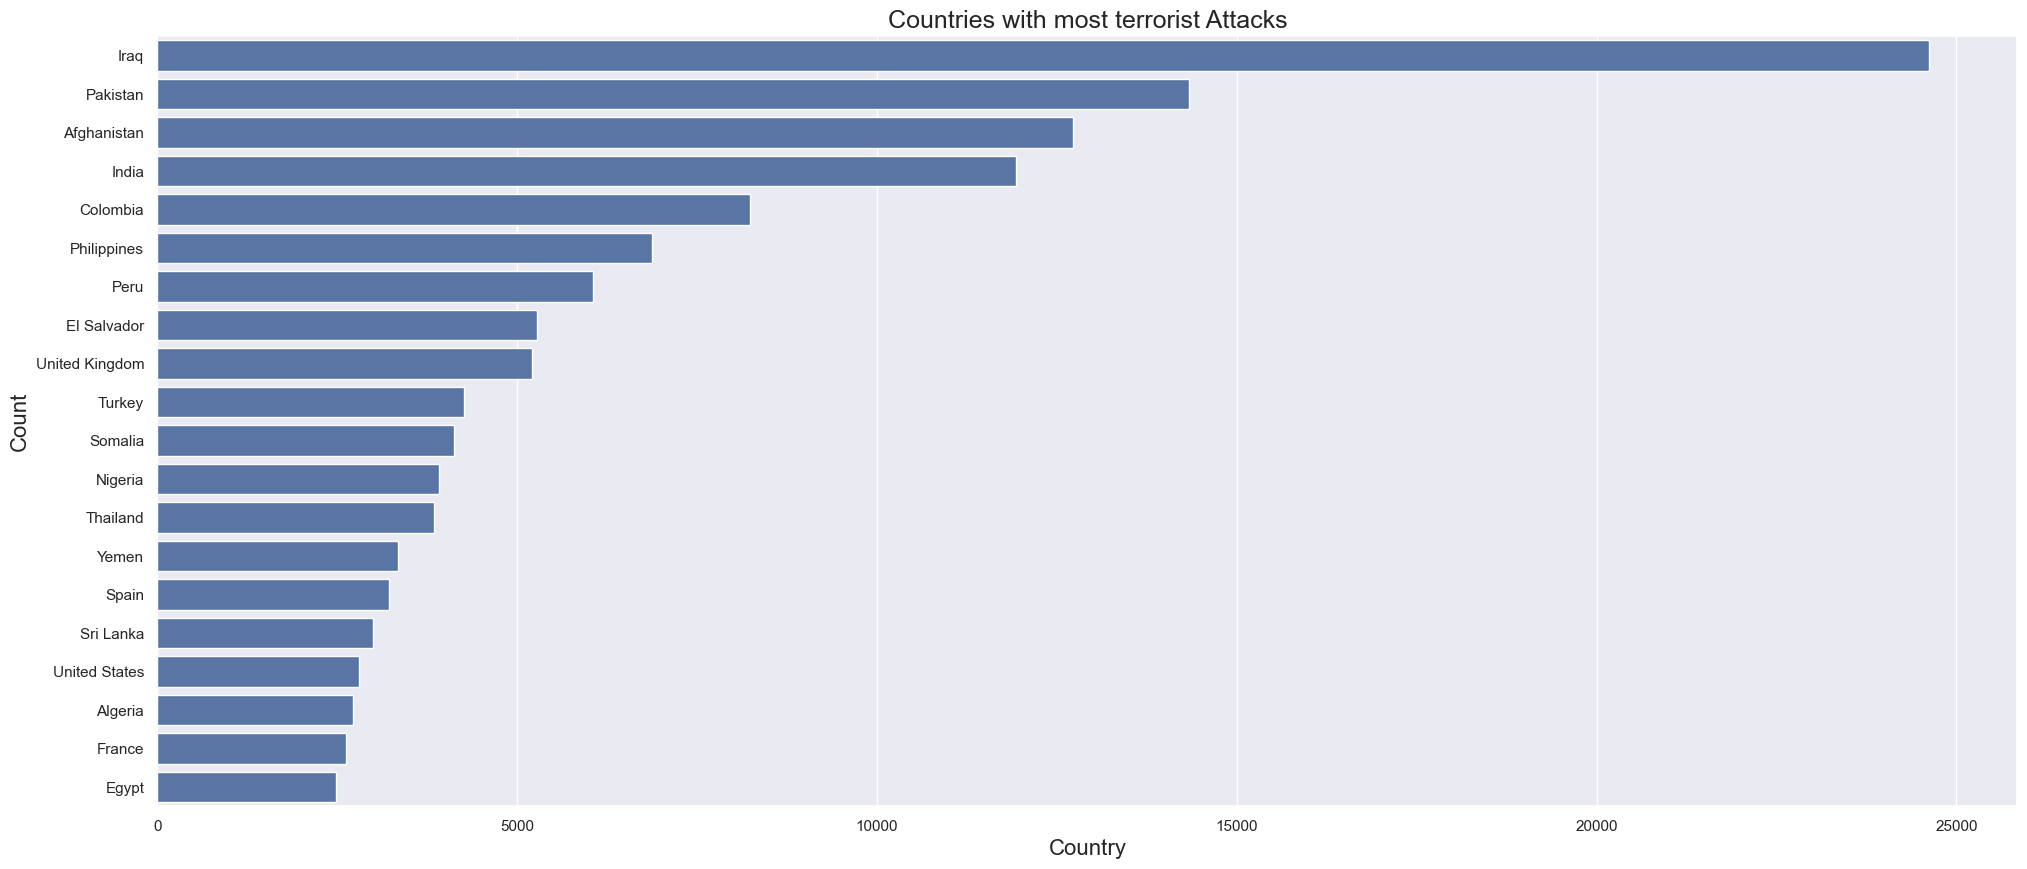

In [12]:
country_count = df['country'].value_counts()
countries = pd.DataFrame({'country':country_count.index, 'count':country_count.values})
countries = countries.sort_values('count', ascending=False)[:20]
# set country as object to not plot unused categories
countries = countries.astype({'country': object, 'count': int})
countries.shape

# plot
f = plt.figure(figsize=(24,10))
sb.barplot(y="country", x="count", data=countries, orient='h')
plt.title('Countries with most terrorist Attacks', {'fontsize':18})
plt.ylabel('Count', {'fontsize':16})
plt.xlabel('Country', {'fontsize':16})

Iraq, Pakistan and Afghanistan are the countries with the most terrorist attacks

## Deaths by terrorism in each country

Text(0.5, 0, 'Country')

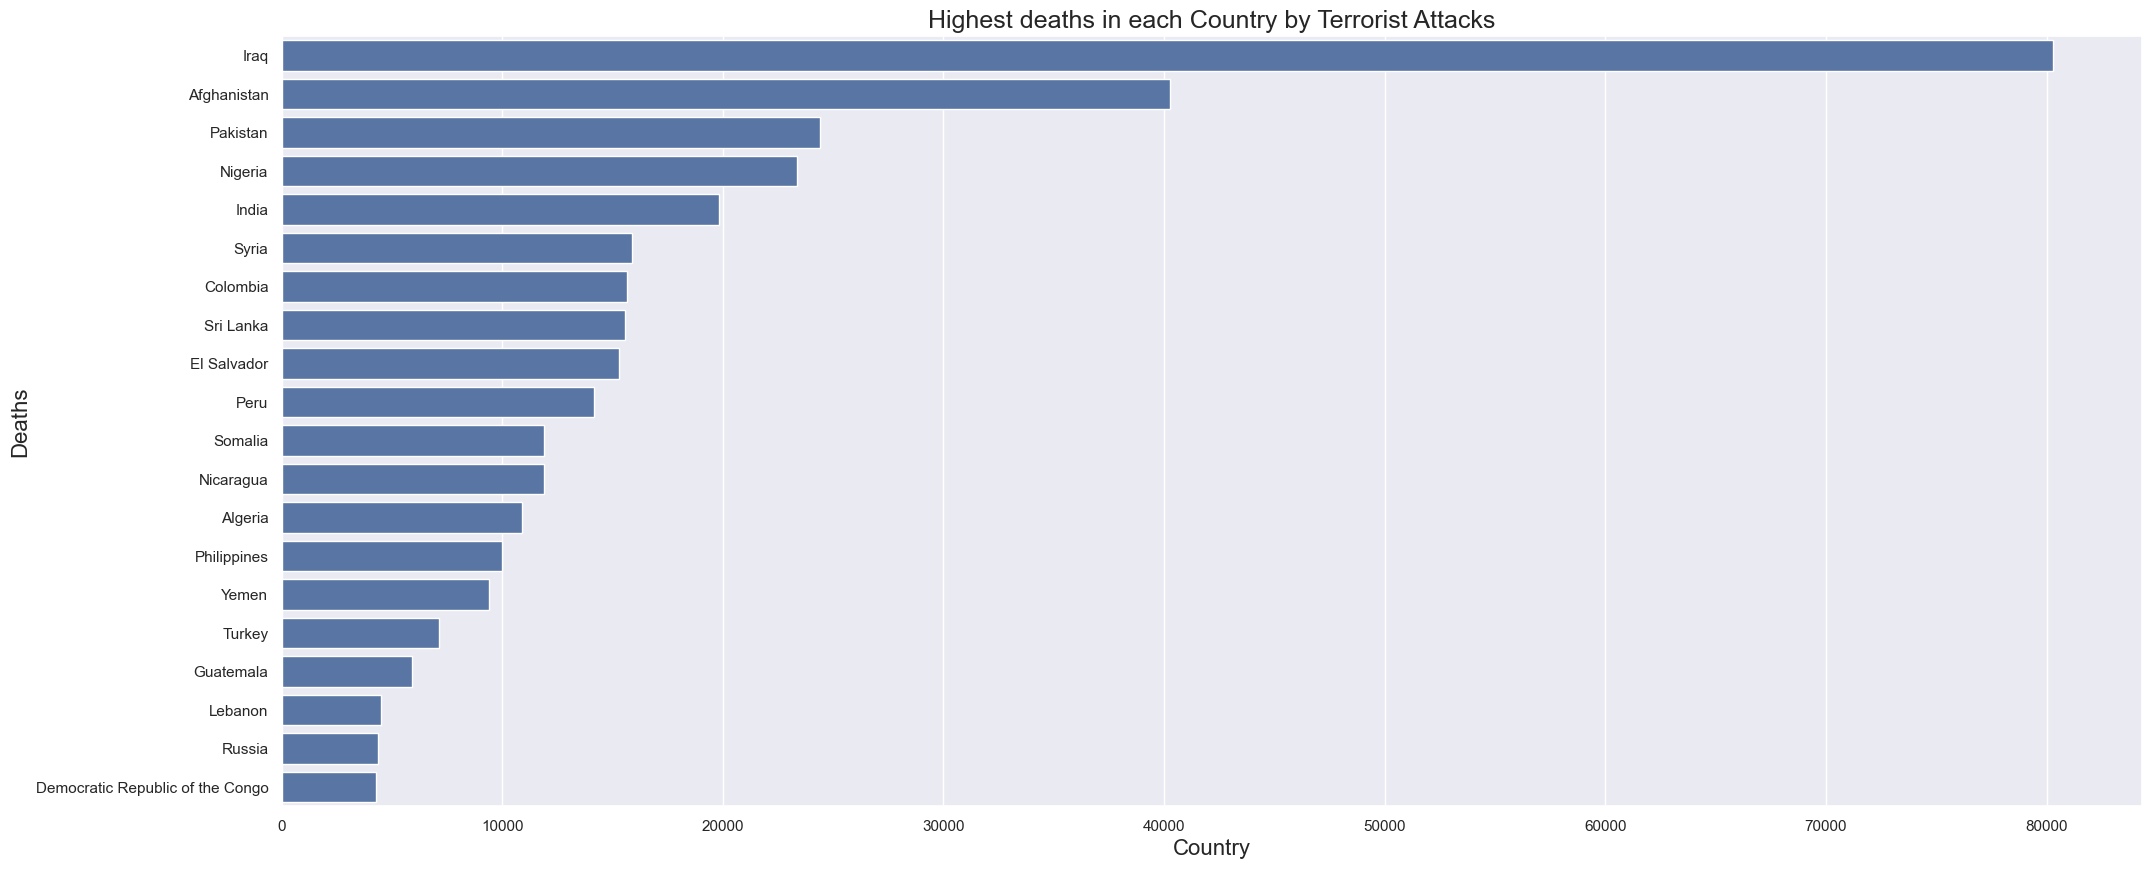

In [13]:
country_nkill = df.groupby(by=['country']).nkill.sum().reset_index()
country_nkill = country_nkill.sort_values('nkill', ascending=False)[:20]
# set country as object to not plot unused categories
country_nkill = country_nkill.astype({'country': object, 'nkill': int})
# plot
f = plt.figure(figsize=(24,10))
sb.barplot(y="country", x="nkill", data=country_nkill, orient='h')
plt.title('Highest deaths in each Country by Terrorist Attacks', {'fontsize':18})
plt.ylabel('Deaths', {'fontsize':16})
plt.xlabel('Country', {'fontsize':16})

## Attacks over the years 

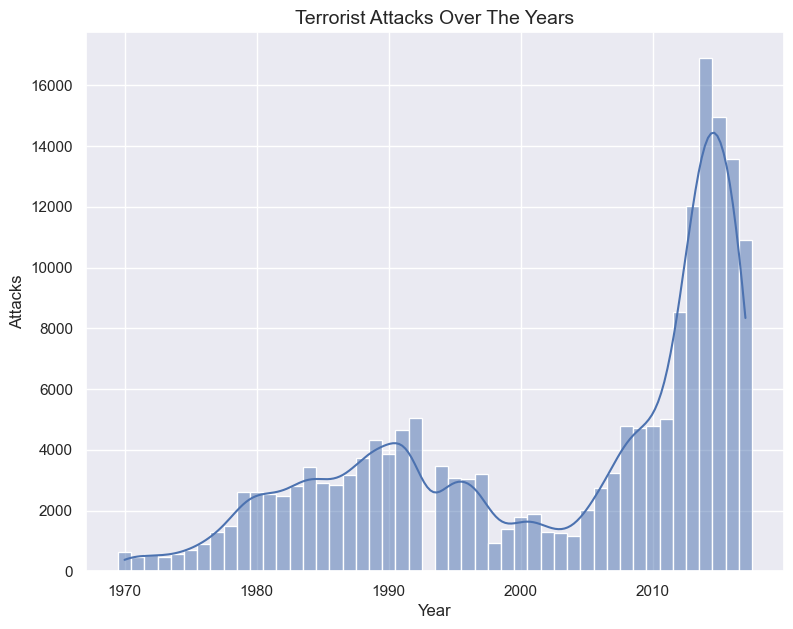

In [14]:
plt.figure(figsize=(9,7))
sb.histplot(df['iyear'], kde=True)
plt.title('Terrorist Attacks Over The Years', {'fontsize':14})
plt.ylabel('Attacks', {'fontsize':12})
plt.xlabel('Year', {'fontsize':12})
plt.grid(axis="y", which='minor')
plt.show()

There is an increasing number of terrorist attacks over the years with the majority of attacks happening after 2010

Text(0.5, 0, 'Count')

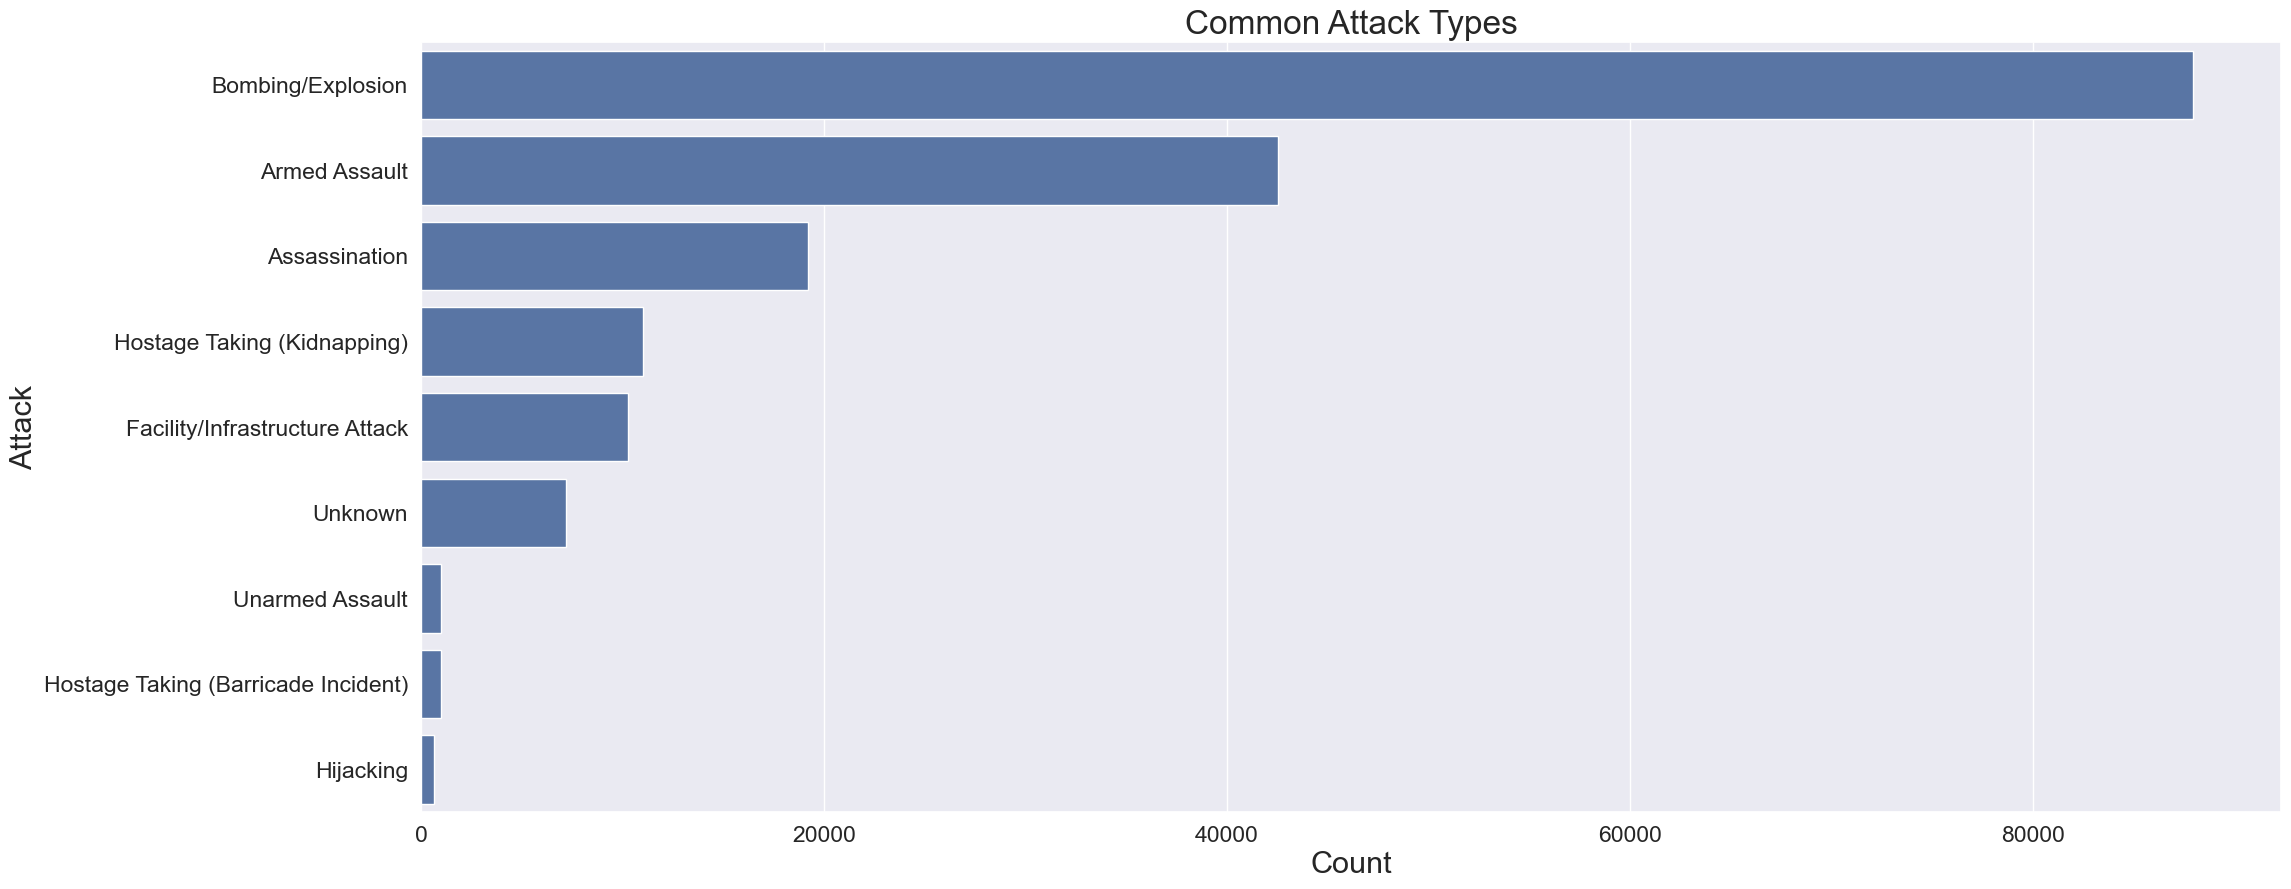

In [15]:
attacktype_count = df['attacktype1'].value_counts()
attacktype = pd.DataFrame({'attacktype1':attacktype_count.index, 'count':attacktype_count.values})
# sort by count
attacktype = attacktype.sort_values('count', ascending=False)
# set attacktype as object to not plot unused categories
attacktype = attacktype.astype({'attacktype1': object, 'count': int})
# plot
f = plt.figure(figsize=(24,10))
sb.set(font_scale=1.5)
sb.barplot(y="attacktype1", x="count", data=attacktype, orient='h')
plt.title('Common Attack Types', {'fontsize':24})
plt.ylabel('Attack', {'fontsize':22})
plt.xlabel('Count', {'fontsize':22})

Text(0.5, 0, 'Count')

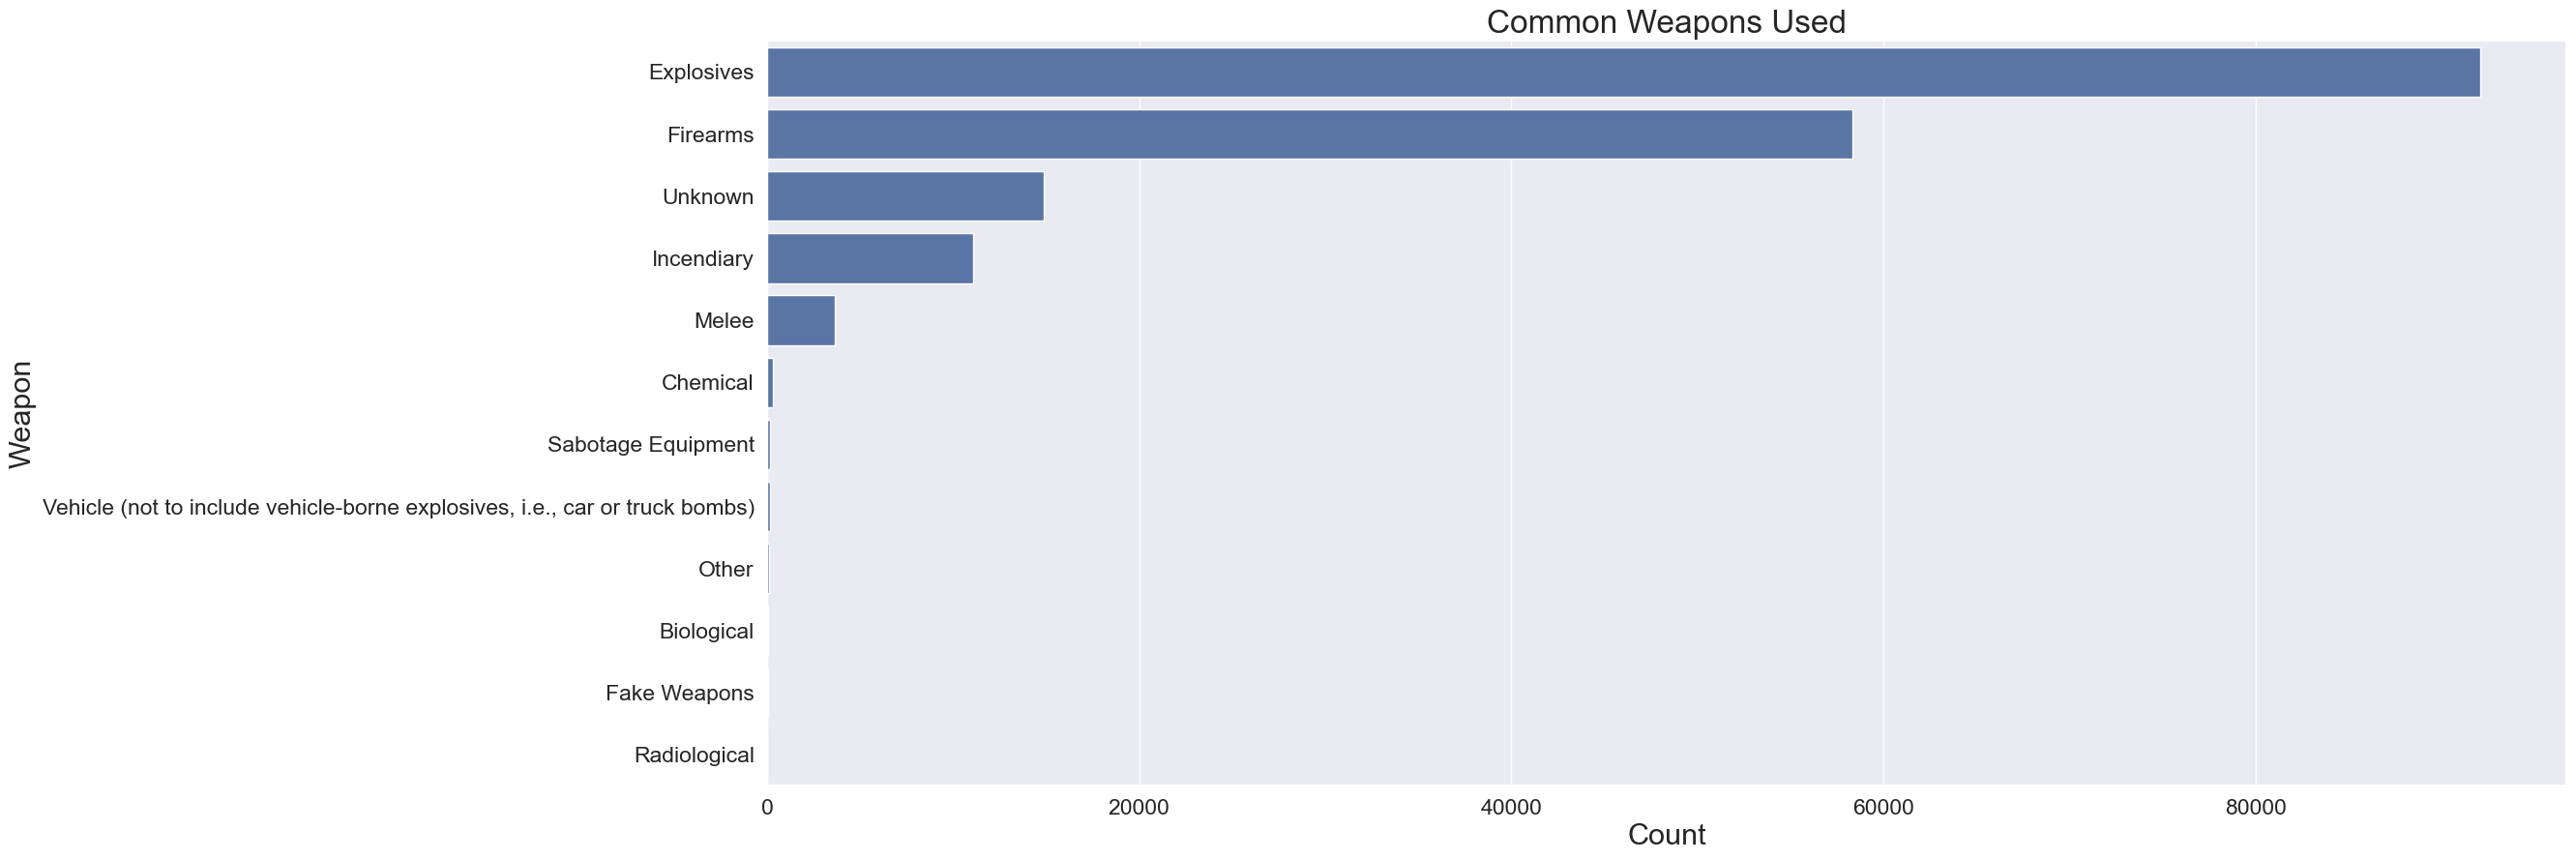

In [16]:
weapon_count = df['weaptype1'].value_counts()
weapon = pd.DataFrame({'weaptype1':weapon_count.index, 'count':weapon_count.values})
# sort by count
weapon = weapon.sort_values('count', ascending=False)
# set attacktype as object to not plot unused categories
weapon = weapon.astype({'weaptype1': object, 'count': int})
# plot
f = plt.figure(figsize=(24,10))
sb.set(font_scale=1.5)
sb.barplot(y="weaptype1", x="count", data=weapon, orient='h')
plt.title('Common Weapons Used', {'fontsize':24})
plt.ylabel('Weapon', {'fontsize':22})
plt.xlabel('Count', {'fontsize':22})